<h1 align='center'> Genomes & Genetics </h1>
<h4 align='center'> Predict The Genetic Disorders </h4>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Introduction**

Genetic disorders occur when a problem in the baby’s chromosomes or genes causes physical abnormalities or illnesses.

In our body, we have millions of cells. In each cell, there are 46 chromosomes, found in 23 matching pairs. Half of the chromosomes are passed on from a person’s mother, and half from their father. These chromosomes carry our DNA, or genes, which are the instructions for how we look and how our body develops and functions. These instructions range from our eye color to our risk for disease.

When a harmful change occurs in these instructions, it can change the way a baby develops. Babies with genetic disorders can be at risk of slow mental and physical development, physical abnormalities, and lifelong illnesses.

Some genetic disorders are hereditary, meaning the genetic change is passed on from their parents. Other genetic changes can happen for the first time in the baby. Parents can carry a change in a gene or a chromosome without realizing it, as it may not cause them any health problems.

> ### Risk Factors for Genetic Disorders
Factors that increase your risk of having a baby with a genetic disorder include:
- Family history of a genetic disorder.
- Prior child with a genetic disorder.
- One parent has a chromosomal abnormality.
- Advanced maternal age (35 or older).
- Advanced paternal age (40 or older).
- Multiple miscarriages or prior stillbirth.
- Prenatal exposure to Drugs, Alcohol, or other Environmental Factors.

**Reference**: https://women.texaschildrens.org/program/high-risk-pregnancy-care/conditions/genetic-disorders

In [2]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

## Statistical Analysis
from scipy import stats
from scipy.stats import norm,skew

# Display all Columns
pd.set_option('display.max_columns', None)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the required Data

> I have kept my data in a folder called "dataset".

In [3]:
# Import the train and test data.
train = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Genetic_Disorder/dataset/test.csv')

## 2. Feature Engineering

> *The features you use influence more than everything else the result. No algorithm alone, to my knowledge, can supplement the information gain given by correct feature engineering.*
— Luca Massaron

**Refer**: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

##### 1. Target Variables

In [4]:
## Understanding the Division of Genetic Disorders.
table1 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Age', aggfunc= np.mean)
table1

Patient Age
Genetic Disorder                             Disorder Subclass                               
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy     6.748644
                                             Leigh syndrome                          6.946026
                                             Mitochondrial myopathy                  6.955514
Multifactorial genetic inheritance disorders Alzheimer's                             6.358779
                                             Cancer                                  7.616279
                                             Diabetes                                6.907623
Single-gene inheritance diseases             Cystic fibrosis                         6.925110
                                             Hemochromatosis                         6.856771
                                             Tay-Sachs                               7.096241

- From the above Pivot Table we understand two things:-
  
  1. The different Disorders for each Genetic Disorder.
  2. The Average Age of Patients for each Genetic Disorder is ~ 7.

In [5]:
# This loop assign these values to the Missing Values according to the Disorder Subclass.
for i in range(0,22083):
    if (train['Genetic Disorder'].isnull()[i] == True):
        if (train['Disorder Subclass'][i] == "Leber's hereditary optic neuropathy"):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Leigh syndrome'):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Mitochondrial myopathy'):
          train['Genetic Disorder'][i] = 'Mitochondrial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == "Alzheimer's"):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Cancer'):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == 'Diabetes'):
          train['Genetic Disorder'][i] = 'Multifactorial genetic inheritance disorders'
        elif (train['Disorder Subclass'][i] == "Cystic fibrosis"):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        elif (train['Disorder Subclass'][i] == 'Hemochromatosis'):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        elif (train['Disorder Subclass'][i] == 'Tay-Sachs'):
          train['Genetic Disorder'][i] = 'Single-gene inheritance diseases'
        else:
          pass
    else:
      continue

- We now need to understand which Disorder Subclass is frequently occuring for each Genetic Disorder.

In [6]:
## Understanding the Division of Genetic Disorders.
table2 = pd.pivot_table(train, index= ['Genetic Disorder', 'Disorder Subclass'], values= 'Patient Id', aggfunc= 'count')
table2

Patient Id
Genetic Disorder                             Disorder Subclass                              
Mitochondrial genetic inheritance disorders  Leber's hereditary optic neuropathy         648
                                             Leigh syndrome                             5160
                                             Mitochondrial myopathy                     4405
Multifactorial genetic inheritance disorders Alzheimer's                                 152
                                             Cancer                                       97
                                             Diabetes                                   1817
Single-gene inheritance diseases             Cystic fibrosis                            3448
                                             Hemochromatosis                            1355
                                             Tay-Sachs                                  2833

In [7]:
# This loop assign these values to the Missing Values according to the Most Frequent Disorder Subclass for each Genetic Disorder.
for i in range(0,22083):
    if (train['Disorder Subclass'].isnull()[i] == True):
        if (train['Genetic Disorder'][i] == "Mitochondrial genetic inheritance disorders"):
          train['Disorder Subclass'][i] = 'Leigh syndrome'     
        elif (train['Genetic Disorder'][i] == "Multifactorial genetic inheritance disorders"):
          train['Disorder Subclass'][i] = 'Diabetes'
        elif (train['Genetic Disorder'][i] == "Single-gene inheritance diseases"):
          train['Disorder Subclass'][i] = 'Cystic fibrosis'
        else:
          pass
    else:
      continue

In [8]:
print(f'The Missing Values in Disorder Subclass Column is: {train["Disorder Subclass"].isnull().sum()}')
print(f'The Missing Values in Genetic Disorder Column is: {train["Genetic Disorder"].isnull().sum()}')

The Missing Values in Disorder Subclass Column is: 278
The Missing Values in Genetic Disorder Column is: 278


In [9]:
## Dropping the Missing Values from the Target Variables.
train.dropna(subset=['Genetic Disorder', "Disorder Subclass"], inplace= True)

In [10]:
train.shape

(21805, 45)

##### 2. Explanatory Variables

In [11]:
## Proper Indexing
train.insert(0, '', range(0, 0 + len(train)))
train.set_index('', inplace= True)

In [12]:
## Dropping all Unnecessary Columns
train.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name", 
                     'Institute Name', 'Location of Institute'], inplace= True)

test.drop(columns= ['Patient Id', 'Place of birth', 'H/O serious maternal illness', 'Patient First Name', 'Family Name', "Father's name", 
                     'Institute Name', 'Location of Institute'], inplace= True)

In [13]:
train.shape

(21805, 37)

###### Patient Age

In [14]:
train['Patient Age'].describe()

count    20397.000000
mean         6.972349
std          4.317753
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: Patient Age, dtype: float64

In [15]:
## Filling the Missing Values with the Average Mean.
train['Patient Age'].fillna(round(train['Patient Age'].mean()), inplace= True)

In [16]:
## Missing Values
train['Patient Age'].isnull().any()

False

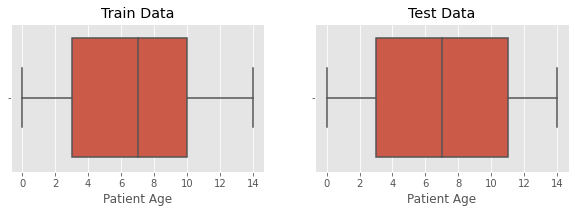

In [17]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Patient Age', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Patient Age', data= test)
plt.title('Test Data')

plt.show()

###### Inherited from Father

In [18]:
train['Inherited from father'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
## Filling Missing Values with 'No'
#### train['Inherited from father'].fillna('No', inplace= True)
#### test['Inherited from father'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Inherited from father'].isnull()[i] == True):
        if (train['Paternal gene'][i] == "Yes"):
          train['Inherited from father'][i] = 'Yes'     
        elif (train['Paternal gene'][i] == "No"):
          train['Inherited from father'][i] = 'No'
        else:
          train['Inherited from father'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Inherited from father'].isnull()[i] == True):
        if (test['Paternal gene'][i] == "Yes"):
          test['Inherited from father'][i] = 'Yes'     
        elif (test['Paternal gene'][i] == "No"):
          test['Inherited from father'][i] = 'No'
        else:
          test['Inherited from father'][i] = 'No'
    else:
      continue

In [20]:
train['Inherited from father'].value_counts()

No     13122
Yes     8683
Name: Inherited from father, dtype: int64

###### Maternal Gene

In [21]:
train['Maternal gene'].unique()

array(['Yes', 'No', nan], dtype=object)

In [22]:
## Filling Missing Values with 'No'
## train['Maternal gene'].fillna('No', inplace= True)
## test['Maternal gene'].fillna('No', inplace= True)

### Train Data
for i in range(0,21805):
    if (train['Maternal gene'].isnull()[i] == True):
        if (train["Genes in mother's side"][i] == "Yes"):
          train['Maternal gene'][i] = 'Yes'     
        elif (train["Genes in mother's side"][i] == "No"):
          train['Maternal gene'][i] = 'No'
        else:
          train['Maternal gene'][i] = 'No'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Maternal gene'].isnull()[i] == True):
        if (test["Genes in mother's side"][i] == "Yes"):
          test['Maternal gene'][i] = 'Yes'     
        elif (test["Genes in mother's side"][i] == "No"):
          test['Maternal gene'][i] = 'No'
        else:
          test['Maternal gene'][i] = 'No'
    else:
      continue

In [23]:
train['Maternal gene'].value_counts()

Yes    12174
No      9631
Name: Maternal gene, dtype: int64

###### Blood cell count (mcL)

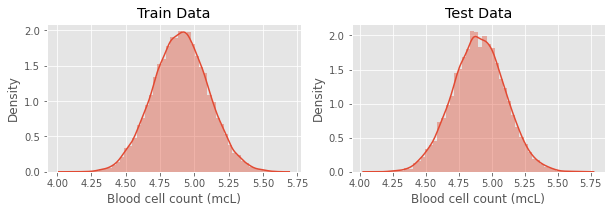

In [24]:
## Checking the Distribution
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.distplot(train['Blood cell count (mcL)'])
plt.title('Train Data')
plt.subplot(2,2,2)
sns.distplot(test['Blood cell count (mcL)'])
plt.title('Test Data')

plt.show()

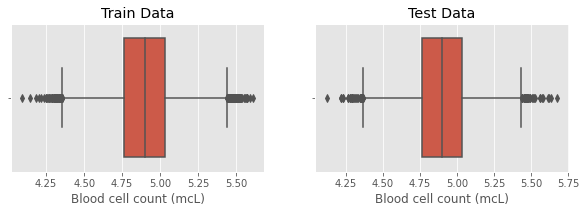

In [25]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'Blood cell count (mcL)', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'Blood cell count (mcL)', data= test)
plt.title('Test Data')

plt.show()

In [26]:
## Z-Score --> When Feature follows Normal Distibution.

### Train Dataset
mean = train['Blood cell count (mcL)'].mean()
std = train['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

train['Blood cell count (mcL)'][train['Blood cell count (mcL)'] < Lower_Bound] = Lower_Bound
train['Blood cell count (mcL)'][train['Blood cell count (mcL)'] > Upper_Bound] = Upper_Bound




### Test Dataset
mean = test['Blood cell count (mcL)'].mean()
std = test['Blood cell count (mcL)'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

test['Blood cell count (mcL)'][test['Blood cell count (mcL)'] < Lower_Bound] = Lower_Bound
test['Blood cell count (mcL)'][test['Blood cell count (mcL)'] > Upper_Bound] = Upper_Bound

###### Mother's Age  && Father's Age

In [27]:
## Filling the Missing Values with the Average Mean.
train["Mother's age"].fillna(round(train["Mother's age"].mean()), inplace= True)

## Filling the Missing Values with the Average Mean.
train["Father's age"].fillna(round(train["Father's age"].mean()), inplace= True)

###### Respiratory Rate (breaths/min)

In [28]:
## Filling Missing Values with 'Normal (30-60)'
## train['Respiratory Rate (breaths/min)'].fillna('Normal (30-60)', inplace= True)
test['Respiratory Rate (breaths/min)'].replace('-99', np.nan, inplace= True)
## test['Respiratory Rate (breaths/min)'].fillna('Normal (30-60)', inplace= True)


### Train Data
for i in range(0,21805):
    if (train['Respiratory Rate (breaths/min)'].isnull()[i] == True):
        if (train["Status"][i] == "Alive"):
          train['Respiratory Rate (breaths/min)'][i] = 'Normal (30-60)'     
        else:
          train['Respiratory Rate (breaths/min)'][i] = 'Tachypnea'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Respiratory Rate (breaths/min)'].isnull()[i] == True):
        if (test["Status"][i] == "Alive"):
          test['Respiratory Rate (breaths/min)'][i] = 'Normal (30-60)'     
        else:
          test['Respiratory Rate (breaths/min)'][i] = 'Tachypnea'
    else:
      continue

In [29]:
train['Respiratory Rate (breaths/min)'].value_counts()

Normal (30-60)    10991
Tachypnea         10814
Name: Respiratory Rate (breaths/min), dtype: int64

###### Heart Rate (rates/min

In [30]:
## Filling Missing Values with 'Normal'
## train['Heart Rate (rates/min'].fillna('Normal', inplace= True)
test['Heart Rate (rates/min'].replace('-99', np.nan, inplace= True)
## test['Heart Rate (rates/min'].fillna('Normal', inplace= True)


### Train Data
for i in range(0,21805):
    if (train['Heart Rate (rates/min'].isnull()[i] == True):
        if (train["Respiratory Rate (breaths/min)"][i] == "Normal (30-60)"):
          train['Heart Rate (rates/min'][i] = 'Normal'    
        else:
          train['Heart Rate (rates/min'][i] = 'Tachycardia'
    else:
      continue


### Test Data
for i in range(0,9465):
    if (test['Heart Rate (rates/min'].isnull()[i] == True):
        if (test["Respiratory Rate (breaths/min)"][i] == "Normal (30-60)"):
          test['Heart Rate (rates/min'][i] = 'Normal'     
        else:
          test['Heart Rate (rates/min'][i] = 'Tachycardia'
    else:
      continue

In [31]:
train['Heart Rate (rates/min'].value_counts()

Normal         11156
Tachycardia    10649
Name: Heart Rate (rates/min, dtype: int64

###### Test 1 - Test 5

In [32]:
train.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)
test.drop(columns= ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], inplace= True)

###### Parental Consent

In [33]:
## Filling Missing Values with 'No'
train['Parental consent'].fillna('No', inplace= True)
test['Parental consent'].replace('-99', np.nan, inplace= True)
test['Parental consent'].fillna('No', inplace= True)

In [34]:
train['Parental consent'].value_counts()

Yes    19719
No      2086
Name: Parental consent, dtype: int64

###### Follow-up

In [35]:
# This loop is for Train Data.
for i in range(0,21805):
    if (train['Follow-up'].isnull()[i] == True):
        if (train['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          train['Follow-up'][i] = 'High'     
        elif (train['Heart Rate (rates/min'][i] == "Tachycardia"):
          train['Follow-up'][i] = 'High'
        else:
          train['Follow-up'][i] = 'Low'
    else:
      continue



test['Follow-up'].replace('-99', np.nan, inplace= True)
# This loop is for Test Data.
for i in range(0,9465):
    if (test['Follow-up'].isnull()[i] == True):
        if (test['Respiratory Rate (breaths/min)'][i] == "Tachypnea"):
          test['Follow-up'][i] = 'High'     
        elif (test['Heart Rate (rates/min'][i] == "Tachycardia"):
          test['Follow-up'][i] = 'High'
        else:
          test['Follow-up'][i] = 'Low'
    else:
      continue

In [36]:
train['Follow-up'].value_counts()

High    11248
Low     10557
Name: Follow-up, dtype: int64

###### Gender

In [37]:
train["Gender"].mode()

0    Ambiguous
dtype: object

In [38]:
## Filling Missing Values with 'Ambiguous'
train['Gender'].fillna('Ambiguous', inplace= True)
test['Gender'].replace('-99', np.nan, inplace= True)
test['Gender'].fillna('Ambiguous', inplace= True)

###### Birth asphyxia

In [39]:
### Train Data
train["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
train["Birth asphyxia"].fillna('No', inplace= True)


### Test Data
test["Birth asphyxia"].replace('No record', 'Not available', inplace= True)
test["Birth asphyxia"].replace('-99', np.nan, inplace= True)
test["Birth asphyxia"].fillna('No', inplace= True)

###### Autopsy shows birth defect (if applicable)

In [40]:
### Train Data
train["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,21805):
    if (train["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (train['Inherited from father'][i] == "Yes"):
          train["Autopsy shows birth defect (if applicable)"][i] = 'Yes'     
        else:
          train["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue



### Test Data
test["Autopsy shows birth defect (if applicable)"].replace('-99', np.nan, inplace= True)
test["Autopsy shows birth defect (if applicable)"].replace('None', 'No', inplace= True)

for i in range(0,9465):
    if (test["Autopsy shows birth defect (if applicable)"].isnull()[i] == True):
        if (test['Inherited from father'][i] == "Yes"):
          test["Autopsy shows birth defect (if applicable)"][i] = 'Yes'     
        else:
          test["Autopsy shows birth defect (if applicable)"][i] = 'No'
    else:
      continue

In [41]:
train["Autopsy shows birth defect (if applicable)"].value_counts()

Not applicable    10955
No                 7097
Yes                3753
Name: Autopsy shows birth defect (if applicable), dtype: int64

###### Folic acid details (peri-conceptional)

In [42]:
train["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

test["Folic acid details (peri-conceptional)"].replace('-99', np.nan, inplace= True)
test["Folic acid details (peri-conceptional)"].fillna('No', inplace= True)

In [43]:
train["Folic acid details (peri-conceptional)"].value_counts()

No     11840
Yes     9965
Name: Folic acid details (peri-conceptional), dtype: int64

###### H/O radiation exposure (x-ray)

In [44]:
train["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
train["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)


test["H/O radiation exposure (x-ray)"].replace('-99', np.nan, inplace= True)
test["H/O radiation exposure (x-ray)"].fillna('No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('-', 'No', inplace= True)
test["H/O radiation exposure (x-ray)"].replace('Not applicable', 'No', inplace= True)

In [45]:
train["H/O radiation exposure (x-ray)"].value_counts()

No     16881
Yes     4924
Name: H/O radiation exposure (x-ray), dtype: int64

###### H/O substance abuse

In [46]:
train["H/O substance abuse"].fillna('No', inplace= True)
train["H/O substance abuse"].replace('-', 'No', inplace= True)
train["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)


test["H/O substance abuse"].replace('-99', np.nan, inplace= True)
test["H/O substance abuse"].fillna('No', inplace= True)
test["H/O substance abuse"].replace('-', 'No', inplace= True)
test["H/O substance abuse"].replace('Not applicable', 'No', inplace= True)

In [47]:
train["H/O substance abuse"].value_counts()

No     16891
Yes     4914
Name: H/O substance abuse, dtype: int64

###### Assisted conception IVF/ART

In [48]:
test["Assisted conception IVF/ART"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Assisted conception IVF/ART'].isnull()[i] == True):
        if (train['Folic acid details (peri-conceptional)'][i] == "Yes"):
          train['Assisted conception IVF/ART'][i] = 'Yes'     
        else:
          train['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Assisted conception IVF/ART'].isnull()[i] == True):
        if (test['Folic acid details (peri-conceptional)'][i] == "Yes"):
          test['Assisted conception IVF/ART'][i] = 'Yes'     
        else:
          test['Assisted conception IVF/ART'][i] = 'No'
    else:
      continue

In [49]:
train["Assisted conception IVF/ART"].value_counts()

No     10969
Yes    10836
Name: Assisted conception IVF/ART, dtype: int64

###### History of Anomalies

In [50]:
train["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

test["History of anomalies in previous pregnancies"].replace('-99', np.nan, inplace= True)
test["History of anomalies in previous pregnancies"].fillna('No', inplace= True)

###### No. of previous abortion

In [51]:
train["No. of previous abortion"].fillna(0, inplace= True)

test["No. of previous abortion"].replace(-99, 0, inplace= True)

###### Birth Defects

**Refer**: https://www.cdc.gov/ncbddd/birthdefects/facts.html

In [52]:
test["Birth defects"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Birth defects'].isnull()[i] == True):
        if (train["Mother's age"][i] > 34):
          if (train["H/O substance abuse"][i] == 'Yes'):
            train['Birth defects'][i] = 'Multiple'     
          else:
            train['Birth defects'][i] = 'Singular'
        else:
            train['Birth defects'][i] = 'Singular'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Birth defects'].isnull()[i] == True):
        if (test["Mother's age"][i] > 34):
          if (test["H/O substance abuse"][i] == 'Yes'):
            test['Birth defects'][i] = 'Multiple'     
          else:
            test['Birth defects'][i] = 'Singular'
        else:
            test['Birth defects'][i] = 'Singular'
    else:
      continue

In [53]:
train["Birth defects"].value_counts()

Singular    11647
Multiple    10158
Name: Birth defects, dtype: int64

###### White Blood cell count (thousand per microliter)

In [54]:
train["White Blood cell count (thousand per microliter)"].fillna(train["White Blood cell count (thousand per microliter)"].mean(), inplace= True)

test["White Blood cell count (thousand per microliter)"].replace(-99, np.nan, inplace= True)
test["White Blood cell count (thousand per microliter)"].fillna(test["White Blood cell count (thousand per microliter)"].mean(), inplace= True)

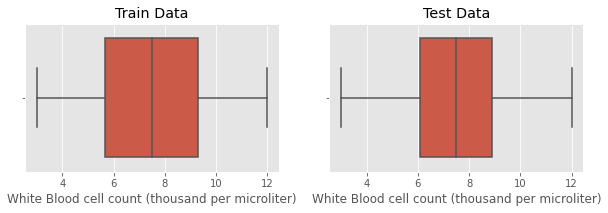

In [55]:
## Checking for Outliers
plt.figure(figsize= (10,6))

plt.subplot(2,2,1)
sns.boxplot(x= 'White Blood cell count (thousand per microliter)', data= train)
plt.title('Train Data')
plt.subplot(2,2,2)
sns.boxplot(x= 'White Blood cell count (thousand per microliter)', data= test)
plt.title('Test Data')

plt.show()

###### Blood test result

**Refer**: https://childrensoncologygroup.org/lowwhitebloodcellcount

In [56]:
## Understanding the Division of Genetic Disorders.
table3 = pd.pivot_table(train, index= ['Blood test result'], 
                        values= 'White Blood cell count (thousand per microliter)', aggfunc= np.mean)
table3

,White Blood cell count (thousand per microliter)
Blood test result,
abnormal,7.462121
inconclusive,7.482236
normal,7.502300
slightly abnormal,7.499233


In [57]:
## train["Blood test result"].fillna('slightly abnormal', inplace= True)
## test["Blood test result"].fillna('slightly abnormal', inplace= True)

test["Blood test result"].replace('-99', np.nan, inplace= True)

# This loop is for test Data.
for i in range(0,21805):
    if (train['Blood test result'].isnull()[i] == True):
        if (5 < train["White Blood cell count (thousand per microliter)"][i] < 10):
          train['Blood test result'][i] = 'normal'     
        elif (10 < train["White Blood cell count (thousand per microliter)"][i] < 1):
          train['Blood test result'][i] = 'abnormal'
        elif (1 < train["White Blood cell count (thousand per microliter)"][i] > 4):
          train['Blood test result'][i] = 'slightly abnormal'
        else:
            train['Blood test result'][i] = 'inconclusive'
    else:
      continue



# This loop is for Test Data.
for i in range(0,9465):
    if (test['Blood test result'].isnull()[i] == True):
        if (5 < test["White Blood cell count (thousand per microliter)"][i] < 10):
          test['Blood test result'][i] = 'normal'     
        elif (10 < test["White Blood cell count (thousand per microliter)"][i] < 1):
          test['Blood test result'][i] = 'abnormal'
        elif (1 < test["White Blood cell count (thousand per microliter)"][i] > 4):
          test['Blood test result'][i] = 'slightly abnormal'
        else:
            test['Blood test result'][i] = 'inconclusive'
    else:
      continue

In [58]:
train["Blood test result"].value_counts()

normal               6298
slightly abnormal    5562
inconclusive         5104
abnormal             4841
Name: Blood test result, dtype: int64

###### Symptom 1- Symptom 5

In [59]:
train["Symptom 1"].fillna(0, inplace= True)
train["Symptom 2"].fillna(0, inplace= True)
train["Symptom 3"].fillna(0, inplace= True)
train["Symptom 4"].fillna(0, inplace= True)
train["Symptom 5"].fillna(0, inplace= True)


## Replacing Boolean values
test["Symptom 1"] = np.where(test["Symptom 1"] == True, 1, 0)
test["Symptom 2"] = np.where(test["Symptom 2"] == True, 1, 0)
test["Symptom 3"] = np.where(test["Symptom 3"] == True, 1, 0)
test["Symptom 4"] = np.where(test["Symptom 4"] == True, 1, 0)
test["Symptom 5"] = np.where(test["Symptom 5"] == True, 1, 0)

### Feature Encoding

In [60]:
train.head(25)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,Yes,No,Yes,No,4.760603,35.0,42.0,Alive,Normal (30-60),Normal,Yes,High,Ambiguous,No,Not applicable,No,No,No,No,Yes,0.0,Singular,9.857562,normal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,35.0,23.0,Deceased,Tachypnea,Normal,Yes,High,Ambiguous,No,No,Yes,No,No,No,Yes,0.0,Multiple,5.522560,normal,1.0,0.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Yes,Low,Ambiguous,Not available,Not applicable,Yes,Yes,No,Yes,Yes,4.0,Singular,7.488293,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,42.0,Deceased,Tachypnea,Normal,Yes,High,Male,Not available,No,No,No,No,No,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,42.0,Alive,Tachypnea,Tachycardia,No,Low,Male,Not available,Not applicable,No,No,No,Yes,No,4.0,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,35.0,42.0,Deceased,Tachypnea,Normal,Yes,Low,Female,Not available,No,No,No,No,No,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,3.0,Yes,No,Yes,Yes,4.901080,35.0,63.0,Alive,Normal (30-60),Normal,No,Low,Male,Not available,Not applicable,No,No,No,Yes,No,3.0,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,3.0,No,No,Yes,Yes,4.964816,40.0,42.0,Alive,Tachypnea,Normal,Yes,Low,Ambiguous,Not available,Not applicable,Yes,No,No,No,Yes,1.0,Singular,9.836352,inconclusive,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
8,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,Tachycardia,Yes,Low,Male,Yes,Not applicable,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [61]:
# Obtaining the Categorical Columns
categorical_features = [features for features in train.columns if train[features].dtypes == 'O'] 
categorical_features

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder',
 'Disorder Subclass']

In [62]:
# Obtaining the Categorical Columns
categorical_features_test = [features for features in test.columns if test[features].dtypes == 'O'] 

In [63]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
for feature in categorical_features:
    ## Encode labels in all Categorical Columns.
    train[feature]= label_encoder.fit_transform(train[feature])



for features in categorical_features_test:
    ## Encode labels in all Categorical Columns.
    test[features]= label_encoder.fit_transform(test[features])

In [64]:
train.head(25)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.0,1,0,1,0,4.760603,35.0,42.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.0,1,9.857562,2,1.0,1.0,1.0,1.0,1.0,0,5
1,4.0,1,1,0,0,4.910669,35.0,23.0,1,1,0,1,0,0,0,0,1,0,0,0,1,0.0,0,5.522560,2,1.0,0.0,1.0,1.0,0.0,2,2
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,1,1,1,0,1,1,1,1,0,1,1,4.0,1,7.488293,2,0.0,1.0,1.0,1.0,1.0,1,3
3,12.0,1,0,1,0,4.705280,21.0,42.0,1,1,0,1,0,2,1,0,0,0,0,0,1,1.0,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,11.0,1,0,1,1,4.720703,32.0,42.0,0,1,1,0,1,2,1,1,0,0,0,1,0,4.0,0,4.098210,3,0.0,0.0,0.0,0.0,0.0,1,1
5,14.0,1,0,1,0,5.103188,35.0,42.0,1,1,0,1,1,1,1,0,0,0,0,0,0,0.0,0,10.272230,2,1.0,0.0,0.0,1.0,0.0,2,2
6,3.0,1,0,1,1,4.901080,35.0,63.0,0,0,0,0,1,2,1,1,0,0,0,1,0,3.0,0,6.825974,2,0.0,0.0,0.0,0.0,0.0,2,8
7,3.0,0,0,1,1,4.964816,40.0,42.0,0,1,0,1,1,0,1,1,1,0,0,0,1,1.0,1,9.836352,1,0.0,0.0,1.0,0.0,0.0,2,8
8,11.0,0,0,1,0,5.209058,45.0,44.0,0,1,1,1,1,2,2,1,1,0,0,0,1,0.0,0,6.669552,3,1.0,1.0,1.0,0.0,1.0,0,6


### Feature Scaling

In [65]:
# Obtaining Numerical Columns
numerical_features = [features for features in train.columns if train[features].dtypes != 'O'] 
numerical_features

['Patient Age',
 "Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Parental consent',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Folic acid details (peri-conceptional)',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'No. of previous abortion',
 'Birth defects',
 'White Blood cell count (thousand per microliter)',
 'Blood test result',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5',
 'Genetic Disorder',
 'Disorder Subclass']

In [66]:
# Selecting all Features that need to be Scaled except the Target Variable.
scale_feature = [features for features in numerical_features if features not in ['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side", 
                                                                                 'Inherited from father', 'Maternal gene', 'Paternal gene', 
                                                                                 'Status', 'Respiratory Rate (breaths/min)', 
                                                                                 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 
                                                                                 'Gender', 'Birth asphyxia', 
                                                                                 'Autopsy shows birth defect (if applicable)', 
                                                                                 'Folic acid details (peri-conceptional)', 
                                                                                 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 
                                                                                 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                                                                                 'Symptom 3', 'Symptom 4', 'Symptom 5', 
                                                                                 'History of anomalies in previous pregnancies', 
                                                                                 'Birth defects', 'Blood test result']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Transform the train set and add the 'Genetic Disorder', 'Disorder Subclass' Columns.
train = pd.concat([train[['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 
                          'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 
                          'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Folic acid details (peri-conceptional)', 
                          'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                          'Symptom 3', 'Symptom 4', 'Symptom 5', 'History of anomalies in previous pregnancies', 'Birth defects', 
                          'Blood test result']].reset_index(drop= True), 
       pd.DataFrame(scaler.fit_transform(train[scale_feature]), columns= scale_feature)], axis= 1) 
       ## Converting to Dataframe as after transform its an array.

train.head()

,Genetic Disorder,Disorder Subclass,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,History of anomalies in previous pregnancies,Birth defects,Blood test result,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,0,5,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1,1,2,-0.714286,-0.511845,0.000000,0.000000,-0.666667,0.652979
1,2,2,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1.0,0.0,1.0,1.0,0.0,1,0,2,-0.428571,0.042123,0.000000,-1.357143,-0.666667,-0.541763
2,1,3,1,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,0.0,1.0,1.0,1.0,1.0,1,1,2,-0.142857,-0.022004,0.545455,-1.428571,0.666667,0.000000
3,0,6,1,0,1,0,1,1,0,1,0,2,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,1,1,0.714286,-0.716068,-1.272727,0.000000,-0.333333,0.118793
4,1,1,1,0,1,1,0,1,1,0,1,2,1,1,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0,0,3,0.571429,-0.659137,-0.272727,0.000000,0.666667,-0.934318


In [67]:
# Selecting all Features that need to be Scaled except the Target Variable.
scale_feature = [features for features in numerical_features if features not in ['Genetic Disorder', 'Disorder Subclass', "Genes in mother's side", 
                                                                                 'Inherited from father', 'Maternal gene', 'Paternal gene', 
                                                                                 'Status', 'Respiratory Rate (breaths/min)', 
                                                                                 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 
                                                                                 'Gender', 'Birth asphyxia', 
                                                                                 'Autopsy shows birth defect (if applicable)', 
                                                                                 'Folic acid details (peri-conceptional)', 
                                                                                 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 
                                                                                 'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2',
                                                                                 'Symptom 3', 'Symptom 4', 'Symptom 5',
                                                                                 'History of anomalies in previous pregnancies', 
                                                                                 'Birth defects', 'Blood test result']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()


# Transform the test set and add the remaining Column.
test = pd.concat([test[["Genes in mother's side", 'Inherited from father', 'Maternal gene', 
                        'Paternal gene', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 
                        'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 
                        'Folic acid details (peri-conceptional)', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 
                        'Assisted conception IVF/ART', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 
                        'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result']].reset_index(drop= True), 
       pd.DataFrame(scaler.fit_transform(test[scale_feature]), columns= scale_feature)], axis= 1) 
       ## Converting to Dataframe as after transform its an array.

test.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,History of anomalies in previous pregnancies,Birth defects,Blood test result,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter)
0,0,1,0,0,0,1,0,0,1,2,2,1,1,1,0,0,1,1,1,1,1,0,0,3,-0.125,0.309384,0.176471,0.826087,0.333333,0.000000
1,1,0,1,1,0,0,0,1,1,2,2,1,1,0,0,0,0,0,0,1,0,1,0,2,0.375,0.822755,-0.117647,0.478261,-0.333333,0.242998
2,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,1,3,-0.250,-0.085089,0.764706,0.782609,-0.333333,0.000000
3,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,1,2,0.750,-0.789999,-0.588235,0.565217,-0.333333,-0.216795
4,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,2,-0.250,0.947969,0.352941,-0.173913,-0.333333,-0.461292


### Feature Selection

In [68]:
## Capture the Independent Variables
X = train.drop(columns= ['Genetic Disorder', 'Disorder Subclass'], axis= 1)

## Capture the Dependent Variable
y1 = train['Genetic Disorder']
y2 = train['Disorder Subclass']

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

## Genetic Disorder
model = ExtraTreesClassifier()
model.fit(X,y1)

## Disorder Subclass 
model2 = ExtraTreesClassifier()
model2.fit(X,y2)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [70]:
print('Y1')
print(model.feature_importances_)
print()
print('Y2')
print(model2.feature_importances_)

Y1
[0.02013671 0.02219567 0.02213487 0.02255066 0.02534012 0.02991267
 0.03028049 0.01652167 0.02923536 0.04047272 0.04031209 0.03035366
 0.03033192 0.02398367 0.02479709 0.03057234 0.02332966 0.02345232
 0.02712859 0.02811716 0.03415934 0.02977534 0.03019855 0.04512227
 0.05410046 0.05583103 0.05278336 0.05336789 0.04814966 0.05535267]

Y2
[0.01988909 0.01993044 0.02109162 0.02190606 0.02466259 0.03059711
 0.03087512 0.01534326 0.02873401 0.04055822 0.04037352 0.03032795
 0.03056291 0.02365643 0.02414254 0.03029002 0.02102403 0.02335678
 0.02720313 0.02905348 0.03628269 0.03053214 0.02818227 0.04614583
 0.05517467 0.05687757 0.0538611  0.0540355  0.0482795  0.05705041]


In [73]:
ranked_features = pd.Series(model.feature_importances_, index= X.columns)
ranked_features.nlargest(19)

Blood cell count (mcL)                              0.055831
White Blood cell count (thousand per microliter)    0.055353
Patient Age                                         0.054100
Father's age                                        0.053368
Mother's age                                        0.052783
No. of previous abortion                            0.048150
Blood test result                                   0.045122
Gender                                              0.040473
Birth asphyxia                                      0.040312
Symptom 5                                           0.034159
Assisted conception IVF/ART                         0.030572
Autopsy shows birth defect (if applicable)          0.030354
Folic acid details (peri-conceptional)              0.030332
Heart Rate (rates/min                               0.030280
Birth defects                                       0.030199
Respiratory Rate (breaths/min)                      0.029913
History of anomalies in 

In [77]:
ranked_features2 = pd.Series(model2.feature_importances_, index= X.columns)
ranked_features2.nlargest(19)

White Blood cell count (thousand per microliter)    0.057050
Blood cell count (mcL)                              0.056878
Patient Age                                         0.055175
Father's age                                        0.054036
Mother's age                                        0.053861
No. of previous abortion                            0.048280
Blood test result                                   0.046146
Gender                                              0.040558
Birth asphyxia                                      0.040374
Symptom 5                                           0.036283
Heart Rate (rates/min                               0.030875
Respiratory Rate (breaths/min)                      0.030597
Folic acid details (peri-conceptional)              0.030563
History of anomalies in previous pregnancies        0.030532
Autopsy shows birth defect (if applicable)          0.030328
Assisted conception IVF/ART                         0.030290
Symptom 4               

In [75]:
ranked_features2.nlargest(19).index

Index(['White Blood cell count (thousand per microliter)',
       'Blood cell count (mcL)', 'Patient Age', 'Father's age', 'Mother's age',
       'No. of previous abortion', 'Blood test result', 'Gender',
       'Birth asphyxia', 'Symptom 5', 'Heart Rate (rates/min',
       'Respiratory Rate (breaths/min)',
       'Folic acid details (peri-conceptional)',
       'History of anomalies in previous pregnancies',
       'Autopsy shows birth defect (if applicable)',
       'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up',
       'Birth defects'],
      dtype='object')

In [78]:
X = X[['White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)', 'Patient Age', "Father's age", "Mother's age",
       'No. of previous abortion', 'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5', 'Heart Rate (rates/min',
       'Respiratory Rate (breaths/min)', 'Folic acid details (peri-conceptional)', 'History of anomalies in previous pregnancies',
       'Autopsy shows birth defect (if applicable)', 'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up', 'Birth defects']]

X.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,0,0,1.0,0,0
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0


In [79]:
X.shape

(21805, 19)

In [80]:
test = test[['White Blood cell count (thousand per microliter)', 'Blood cell count (mcL)', 'Patient Age', "Father's age", 
             "Mother's age", 'No. of previous abortion', 'Blood test result', 'Gender', 'Birth asphyxia', 'Symptom 5', 
             'Heart Rate (rates/min', 'Respiratory Rate (breaths/min)', 'Folic acid details (peri-conceptional)', 
             'History of anomalies in previous pregnancies', 'Autopsy shows birth defect (if applicable)', 
             'Assisted conception IVF/ART', 'Symptom 4', 'Follow-up', 'Birth defects']]

test.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects
0,0.000000,0.309384,-0.125,0.826087,0.176471,0.333333,3,2,2,1,0,1,1,0,1,0,1,1,0
1,0.242998,0.822755,0.375,0.478261,-0.117647,-0.333333,2,2,2,0,0,0,1,1,1,0,1,1,0
2,0.000000,-0.085089,-0.250,0.782609,0.764706,-0.333333,3,0,1,0,0,1,0,0,0,1,1,1,1
3,-0.216795,-0.789999,0.750,0.565217,-0.588235,-0.333333,2,0,0,1,0,0,1,1,1,1,0,1,1
4,-0.461292,0.947969,-0.250,-0.173913,0.352941,-0.333333,2,0,0,0,1,1,1,0,0,0,1,1,0


In [81]:
 ## Combining the Target Variables.
 train = pd.concat([X, y1, y2], axis=1)
 train.head()

,White Blood cell count (thousand per microliter),Blood cell count (mcL),Patient Age,Father's age,Mother's age,No. of previous abortion,Blood test result,Gender,Birth asphyxia,Symptom 5,Heart Rate (rates/min,Respiratory Rate (breaths/min),Folic acid details (peri-conceptional),History of anomalies in previous pregnancies,Autopsy shows birth defect (if applicable),Assisted conception IVF/ART,Symptom 4,Follow-up,Birth defects,Genetic Disorder,Disorder Subclass
0,0.652979,-0.511845,-0.714286,0.000000,0.000000,-0.666667,2,0,0,1.0,0,0,0,1,1,0,1.0,0,1,0,5
1,-0.541763,0.042123,-0.428571,-1.357143,0.000000,-0.666667,2,0,0,0.0,0,1,1,1,0,0,1.0,0,0,2,2
2,0.000000,-0.022004,-0.142857,-1.428571,0.545455,0.666667,2,0,1,1.0,1,0,1,1,1,1,1.0,1,1,1,3
3,0.118793,-0.716068,0.714286,0.000000,-1.272727,-0.333333,1,2,1,0.0,0,1,0,1,0,0,0.0,0,1,0,6
4,-0.934318,-0.659137,0.571429,0.000000,-0.272727,0.666667,3,2,1,0.0,1,1,0,0,1,1,0.0,1,0,1,1


In [84]:
## Re-checking for Missing Values
train.isnull().any()

White Blood cell count (thousand per microliter)    False
Blood cell count (mcL)                              False
Patient Age                                         False
Father's age                                        False
Mother's age                                        False
No. of previous abortion                            False
Blood test result                                   False
Gender                                              False
Birth asphyxia                                      False
Symptom 5                                           False
Heart Rate (rates/min                               False
Respiratory Rate (breaths/min)                      False
Folic acid details (peri-conceptional)              False
History of anomalies in previous pregnancies        False
Autopsy shows birth defect (if applicable)          False
Assisted conception IVF/ART                         False
Symptom 4                                           False
Follow-up     

In [85]:
## Re-checking for Missing Values
test.isnull().any()

White Blood cell count (thousand per microliter)    False
Blood cell count (mcL)                              False
Patient Age                                         False
Father's age                                        False
Mother's age                                        False
No. of previous abortion                            False
Blood test result                                   False
Gender                                              False
Birth asphyxia                                      False
Symptom 5                                           False
Heart Rate (rates/min                               False
Respiratory Rate (breaths/min)                      False
Folic acid details (peri-conceptional)              False
History of anomalies in previous pregnancies        False
Autopsy shows birth defect (if applicable)          False
Assisted conception IVF/ART                         False
Symptom 4                                           False
Follow-up     

In [86]:
train.to_csv('/content/drive/MyDrive/Genetic_Disorder/Final_train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Genetic_Disorder/Final_test.csv', index=False)